# Car License Plate Detection

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create the variable X containing all the images of cars by resizing them to 200 * 200.

In [3]:
IMAGE_SIZE = 224

In [4]:
import os

kaggle_drive_path = '/content/drive/MyDrive/archive (1)'
images_path = os.path.join(kaggle_drive_path, 'images')
annotations_path = os.path.join(kaggle_drive_path, 'annotations')

print(f"Image directory set to: {images_path}")
print(f"Annotation directory set to: {annotations_path}")

Image directory set to: /content/drive/MyDrive/archive (1)/images
Annotation directory set to: /content/drive/MyDrive/archive (1)/annotations


In [5]:
import glob
import cv2
import numpy as np
from lxml import etree

img_dir = images_path

data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
files.sort()

X = []
for f1 in files:
    img = cv2.imread(f1)
    if img is not None:
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        X.append(np.array(img))
    else:
        print(f"Warning: Could not read image {f1}")

print(f"Loaded {len(X)} images into X.")

Loaded 433 images into X.


In [6]:
def resizeannotation(f):
    tree = etree.parse(f)
    width = 0
    height = 0
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)

    bndbox_coords = []
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text) / (width / IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text) / (height / IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text) / (width / IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text) / (height / IMAGE_SIZE)
        bndbox_coords.append([int(xmax), int(ymax), int(xmin), int(ymin)])

    return bndbox_coords[0] if bndbox_coords else []

annotations_dir = annotations_path

text_files = [os.path.join(annotations_dir, f) for f in sorted(os.listdir(annotations_dir)) if f.endswith('.xml')]

y = []
for i in text_files:
    try:
        y.append(resizeannotation(i))
    except Exception as e:
        print(f"Error processing annotation file {i}: {e}")
        y.append([])

print(f"Loaded {len(y)} annotations into y.")
print("First 5 annotations in y:", y[:5])

Loaded 433 annotations into y.
First 5 annotations in y: [[187, 144, 101, 104], [146, 144, 75, 115], [169, 147, 78, 4], [119, 109, 98, 95], [134, 164, 93, 150]]


In [7]:
example_annotation_file = os.path.join(annotations_path, 'Cars147.xml')
print(f"Example annotation for '{example_annotation_file}': {resizeannotation(example_annotation_file)}")

print(f"Shape of X (images): {np.array(X).shape}")
print(f"Shape of y (annotations): {np.array(y).shape}")

Example annotation for '/content/drive/MyDrive/archive (1)/annotations/Cars147.xml': [188, 141, 101, 104]
Shape of X (images): (433, 224, 224, 3)
Shape of y (annotations): (433, 4)


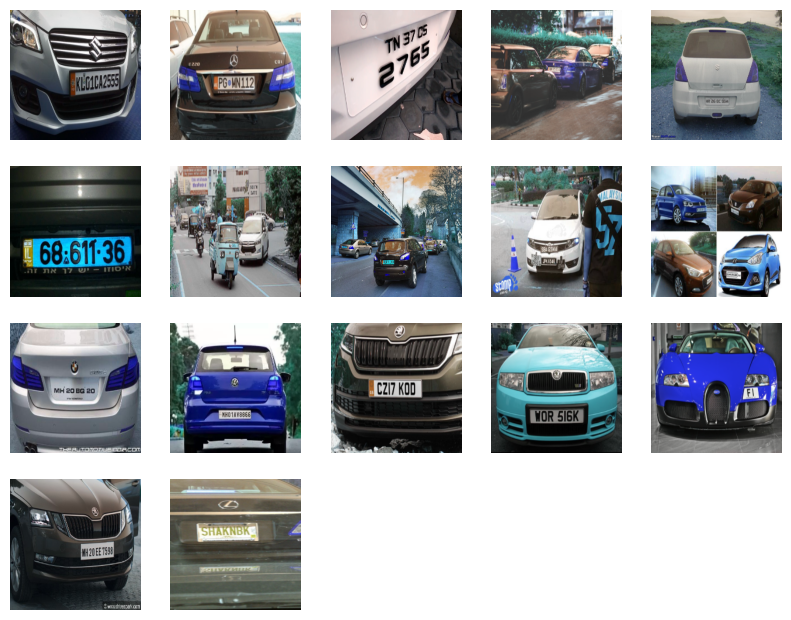

In [8]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])
plt.show()

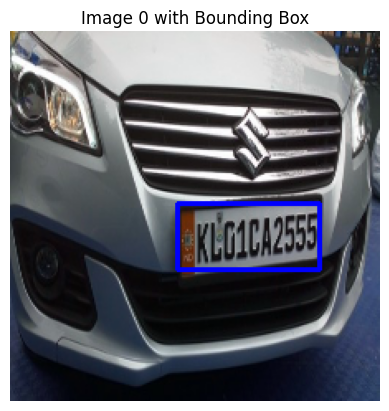

In [9]:
import copy

image_with_bbox_0 = copy.deepcopy(X[0])
image_with_bbox_0 = cv2.rectangle(image_with_bbox_0, (y[0][2], y[0][3]), (y[0][0], y[0][1]), (0, 0, 255), 2)
plt.imshow(image_with_bbox_0)
plt.title("Image 0 with Bounding Box")
plt.axis('off')
plt.show()

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
X = X / 255
y = y / 255